<a href="https://colab.research.google.com/github/nowshaba/Intrusion-Detection/blob/main/SQL_Injection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import sklearn.metrics as m
import keras
import tensorflow as tf
import sklearn
import tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Avoid warnings
import warnings
warnings.filterwarnings('ignore')
#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Import  Data
j=0
n=0
#to check whih files have both attack and normal labels
for j in range(0,52):
  df3=pd.read_csv("/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_"+str(j)+".csv")
  j+1
  for i in df3['Label']:
    if (i=='SQL_Injection'):
      n=1
  if (n==1):
    print("n is",n, "and j is",j)

n is 1 and j is 29
n is 1 and j is 30
n is 1 and j is 31
n is 1 and j is 32
n is 1 and j is 33
n is 1 and j is 34
n is 1 and j is 35
n is 1 and j is 36
n is 1 and j is 37
n is 1 and j is 38
n is 1 and j is 39
n is 1 and j is 40
n is 1 and j is 41
n is 1 and j is 42
n is 1 and j is 43
n is 1 and j is 44
n is 1 and j is 45
n is 1 and j is 46
n is 1 and j is 47
n is 1 and j is 48
n is 1 and j is 49
n is 1 and j is 50
n is 1 and j is 51


In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df1 = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_29.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_30.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_31.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_32.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_33.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_34.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_35.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_36.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_37.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_38.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_39.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_40.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_41.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_42.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_43.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_44.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_45.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_46.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_47.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_48.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_49.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_50.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/10.SQL_Injection/SQL_Injection_51.csv"]), ignore_index=True)

In [ ]:
drop_cols = []
for i in df1.columns:
    if len(df1[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df1.drop(drop_cols, 1, inplace=True)

print(df1.columns)

Total columns with only 1 unique value: 81
Index(['frame.len', 'frame.number', 'frame.time', 'frame.time_delta',
       'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       ...
       'tls.alert_message.level', 'tls.app_data_proto',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=173)


In [ ]:
df1.dropna(1,inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148359 entries, 0 to 1148358
Data columns (total 27 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   frame.len                   1148359 non-null  int64  
 1   frame.number                1148359 non-null  int64  
 2   frame.time                  1148359 non-null  object 
 3   frame.time_delta            1148359 non-null  float64
 4   frame.time_delta_displayed  1148359 non-null  float64
 5   frame.time_epoch            1148359 non-null  int64  
 6   frame.time_relative         1148359 non-null  float64
 7   radiotap.dbm_antsignal      1148359 non-null  int64  
 8   radiotap.length             1148359 non-null  int64  
 9   radiotap.present.tsft       1148359 non-null  object 
 10  radiotap.timestamp.ts       1148359 non-null  int64  
 11  wlan.duration               1148359 non-null  int64  
 12  wlan.fc.ds                  1148359 non-null  object 
 1

In [ ]:
#Split dataset on train and test
from sklearn.model_selection import train_test_split
train, test=train_test_split(df1,test_size=0.3, random_state=10)

#Exploratory Analysis
# Descriptive statistics
train.describe()
test.describe()
train['Label'].value_counts()
test['Label'].value_counts()

Normal           343735
SQL_Injection       773
Name: Label, dtype: int64

In [ ]:
#for data imbalance
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
df_majority = df1[df1.Label=='Normal']
df_minority = df1[df1.Label=='SQL_Injection']
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=10000,    
                                 random_state=10)

In [ ]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
#Split dataset on train and test
from sklearn.model_selection import train_test_split
train, test=train_test_split(df_upsampled,test_size=0.3, random_state=10)

#Exploratory Analysis
# Descriptive statistics
train.describe()
test.describe()
train['Label'].value_counts()
test['Label'].value_counts()

Normal           343714
SQL_Injection      3005
Name: Label, dtype: int64

In [ ]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float32','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float32','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float32','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [ ]:
from sklearn.preprocessing import OneHotEncoder 

#creating one hot encoder object 
onehotencoder = OneHotEncoder() 

trainDep = train['Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test['Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [ ]:
train_X=sc_traindf
train_y=trainDep[:,0]

test_X=sc_testdf
test_y=testDep[:,0]

In [ ]:
train['Label'].value_counts()
test['Label'].value_counts()

Normal           343714
SQL_Injection      3005
Name: Label, dtype: int64

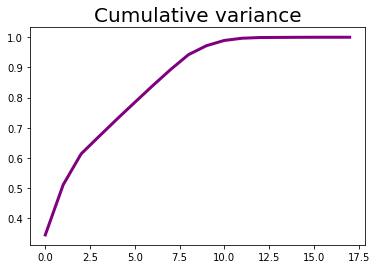

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(train_X)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#800080')
plt.title('Cumulative variance', size=20)
plt.show()

In [ ]:
Loads = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(train_X.columns) + 1)],
    index=train_X.columns
)
Loads.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
frame.len,0.879392,-0.013260,0.119403,-0.060880,0.003079,0.009755,0.013561,0.000743,-0.041839,0.349525,-0.034173,-0.288331,0.003061,-0.000489,0.003392,0.000592,-0.000362,-1.031322e-06
frame.number,-0.020830,-0.997373,-0.012631,-0.002719,0.002452,-0.000732,0.002059,-0.007812,0.000326,0.001303,0.002150,-0.002168,-0.000651,0.067486,-0.001412,-0.002692,0.000032,-2.841390e-08
frame.time_epoch,-0.022870,-0.999065,-0.012207,-0.002007,0.002334,-0.000989,0.001864,-0.006108,-0.000079,-0.000941,0.000953,0.001399,-0.000122,-0.033673,0.000665,0.001535,0.000002,-2.669936e-03
radiotap.dbm_antsignal,0.428600,-0.018992,0.888081,0.014744,-0.030563,0.037902,-0.001889,-0.020225,0.090817,-0.117404,0.006408,0.020210,0.004689,0.003482,0.001528,0.041663,-0.000120,3.431593e-06
radiotap.length,0.951212,-0.004270,-0.149436,-0.085132,0.013451,-0.030532,0.025878,0.041482,-0.084516,-0.106151,-0.109614,0.028111,-0.175668,-0.000066,-0.004423,0.001220,-0.000276,-1.800772e-07


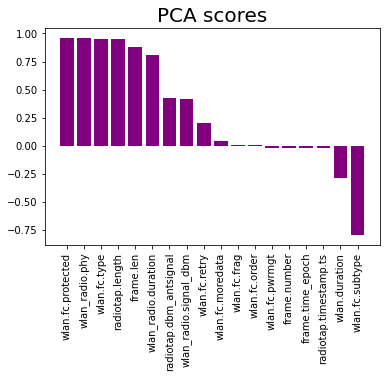

In [ ]:
pc1_Loads = Loads.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_Loads = pc1_Loads.reset_index()
pc1_Loads.columns = ['Feature', 'CorrelationtoPC1']

plt.bar(x=pc1_Loads['Feature'], height=pc1_Loads['CorrelationtoPC1'], color='#800080')
plt.title('PCA scores', size=20)
plt.xticks(rotation='vertical')
plt.show()